<a href="https://colab.research.google.com/github/niviacampos/DIO_Analise_Pandas/blob/master/Analise_AdventureWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [58]:
# upload do arquivo pelo código
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [59]:
df_adv_works = pd.read_excel('AdventureWorks.xlsx')

In [190]:
df_adv_works.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7


In [61]:
# Verificando total de linhas e colunas
df_adv_works.shape

(904, 16)

In [62]:
df_adv_works.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [63]:
# Receita total
df_adv_works['Valor Venda'].sum()

5984606.1426

In [64]:
# Criando coluna de Custo (custo unitário x qtde)
df_adv_works['Custo'] = df_adv_works['Custo Unitário'].mul(df_adv_works['Quantidade'])

In [189]:
df_adv_works.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [66]:
# Custo Total
df_adv_works['Custo'].sum()

2486783.05

In [67]:
round(df_adv_works['Custo'].sum(), 2)

2486783.05

In [68]:
# Criando coluna de lucro (receita - custo total)
df_adv_works['Lucro'] = df_adv_works['Valor Venda'] - df_adv_works['Custo']

In [188]:
df_adv_works.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [70]:
# Lucro Total
round(df_adv_works['Lucro'].sum(), 2)

3497823.09

In [71]:
# Tempo de envio do produto
df_adv_works['Tempo_envio'] = df_adv_works['Data Envio'] - df_adv_works['Data Venda']

In [95]:
df_adv_works.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7


In [73]:
 # Média de tempo de envio para cada Marca. Para o cálculo é preciso alterar o type para int
 df_adv_works['Tempo_envio'] = df_adv_works['Tempo_envio'].dt.days

In [94]:
df_adv_works.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [75]:
df_adv_works['Tempo_envio'].dtypes

dtype('int64')

In [93]:
df_adv_works.groupby('Marca')['Tempo_envio'].mean().round(2)

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_envio, dtype: float64

In [92]:
# Agrupamento com duas colunas (Ano e Marca)
df_adv_works.groupby([df_adv_works['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [89]:
# Formatando a visualização de valores
pd.options.display.float_format = '{:20,.2f}'.format

In [96]:
df_adv_works.groupby([df_adv_works['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [98]:
# criando uma variável e passando o reset.index é gerado um dataframe com as colunas especificadas
lucro_anual = df_adv_works.groupby([df_adv_works['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()

In [99]:
lucro_anual

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [100]:
# Quantidade de produtos vendidos
df_adv_works.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

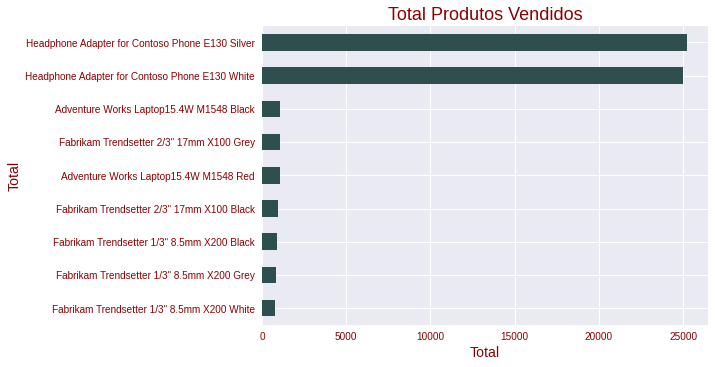

In [145]:
# Gráfico Total de Produtos Vendidos
df_adv_works.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(color = 'darkslategray')
plt.title('Total Produtos Vendidos', size = 18, color = 'darkred')
plt.xlabel('Total', size = 14, color = 'darkred')
plt.ylabel('Total', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');


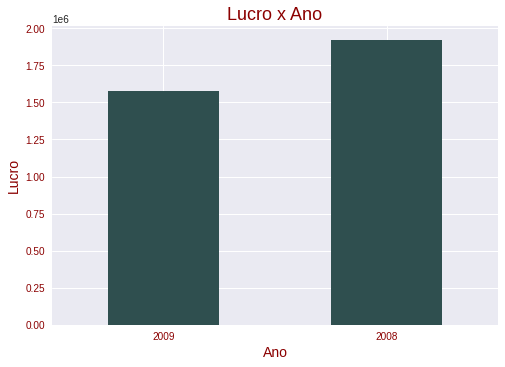

In [144]:
# Gráfico Lucro x Ano
df_adv_works.groupby(df_adv_works['Data Venda'].dt.year)['Lucro'].sum().sort_values(ascending=True).plot.bar(color = 'darkslategray')
plt.title('Lucro x Ano', size = 18, color = 'darkred')
plt.xlabel('Ano', size = 14, color = 'darkred')
plt.ylabel('Lucro', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

In [122]:
# Vendas de 2009
vendas_2009 = df_adv_works[df_adv_works['Data Venda'].dt.year == 2009]

In [123]:
vendas_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


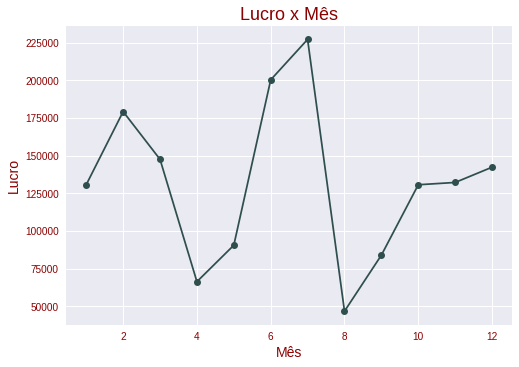

In [143]:
# Gráfico Lucro x Mês
vendas_2009.groupby(vendas_2009['Data Venda'].dt.month)['Lucro'].sum().plot(color = 'darkslategray', marker = 'o')
plt.title('Lucro x Mês', size = 18, color = 'darkred')
plt.xlabel('Mês', size = 14, color = 'darkred')
plt.ylabel('Lucro', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

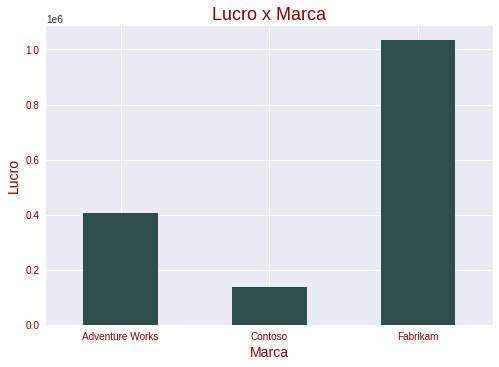

In [139]:
# Gráfico Lucro x Marca
vendas_2009.groupby('Marca')['Lucro'].sum().plot.bar(color = 'darkslategray')
plt.title('Lucro x Marca', size = 18, color = 'darkred')
plt.xlabel('Marca', size = 14, color = 'darkred')
plt.ylabel('Lucro', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

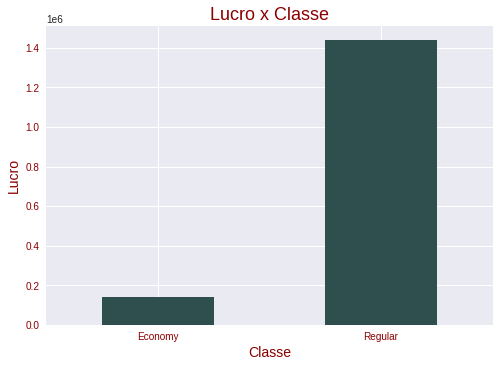

In [148]:
# Lucro x Classe
vendas_2009.groupby('Classe')['Lucro'].sum().plot.bar(color = 'darkslategray')
plt.title('Lucro x Classe', size = 18, color = 'darkred')
plt.xlabel('Classe', size = 14, color = 'darkred')
plt.ylabel('Lucro', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

In [150]:
df_adv_works['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

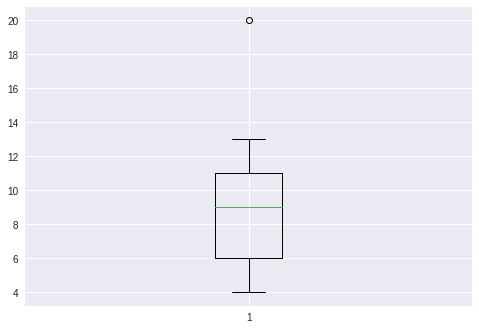

In [152]:
# Gráfico de Boxplot (analisa os dados do describe)
plt.boxplot(df_adv_works['Tempo_envio']);

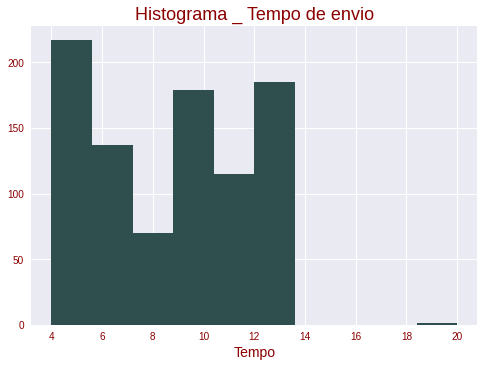

In [157]:
# Histograma
plt.hist(df_adv_works['Tempo_envio'], color ='darkslategray')
plt.title('Histograma _ Tempo de envio', size = 18, color = 'darkred')
plt.xlabel('Tempo', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

In [158]:
# Identificando o outlier
df_adv_works[df_adv_works['Tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [159]:
# Lucro x Loja
df_adv_works.groupby('ID Loja')['Lucro'].sum().sort_values(ascending=False)

ID Loja
199           1,294,718.51
307           1,186,611.46
306           1,016,493.12
Name: Lucro, dtype: float64

In [166]:
df_adv_works.groupby([df_adv_works['Data Venda'].dt.year, 'ID Loja'])['Lucro'].sum().sort_values(ascending=False)

Data Venda  ID Loja
2008        199                 738,540.81
2009        307                 598,111.99
2008        306                 593,037.44
            307                 588,499.47
2009        199                 556,177.71
            306                 423,455.69
Name: Lucro, dtype: float64

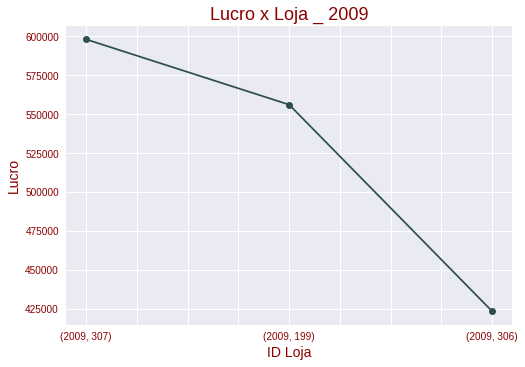

In [185]:
vendas_2009.groupby([vendas_2009['Data Venda'].dt.year, 'ID Loja'])['Lucro'].sum().sort_values(ascending=False).plot(color ='darkslategray', marker = 'o')
plt.title('Lucro x Loja _ 2009', size = 18, color = 'darkred')
plt.xlabel('ID Loja', size = 14, color = 'darkred')
plt.ylabel('Lucro', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [179]:
df_adv_works.groupby('ID Loja')['Lucro'].sum()

ID Loja
199           1,294,718.51
306           1,016,493.12
307           1,186,611.46
Name: Lucro, dtype: float64

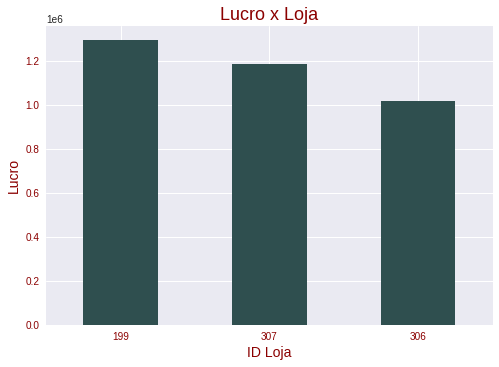

In [184]:
# Gráfico de Lucro x Lojas
df_adv_works.groupby('ID Loja')['Lucro'].sum().sort_values(ascending=False).plot.bar(color ='darkslategray')
plt.title('Lucro x Loja', size = 18, color = 'darkred')
plt.xlabel('ID Loja', size = 14, color = 'darkred')
plt.ylabel('Lucro', size = 14, color = 'darkred')
plt.xticks(rotation = 'horizontal', size = 10, color = 'darkred')
plt.yticks(size = 10, color = 'darkred');

In [187]:
# Gerando arquivo csv
df_adv_works.to_csv('df_adv_works_new.csv', index = False)